In [1]:
%pip install

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")

[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install --upgrade pip


  Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pandas numpy matplotlib seaborn

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 435.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.9 kB 372.4 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 359.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.9 kB 435.7 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/165.9 kB 469.7 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.9 kB 512.0 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.9 kB 512.0 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.9 kB 512.0 kB/s eta 0:00:01
     -------------------------- --------- 122.9/165.9 kB 379.3 kB/s 

In [4]:
import pandas as pd
import numpy as np

In [7]:
#Step: 2

train_data = pd.read_csv('D:/internship/dataset/train.csv')
test_data = pd.read_csv('D:/internship/dataset/test.csv')


In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#step: 3

# Handle missing values
train_data = train_data.assign(
    Age=train_data['Age'].fillna(train_data['Age'].median()),
    Fare=train_data['Fare'].fillna(train_data['Fare'].median())
)


In [11]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])


In [12]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])


In [13]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [14]:
#Step: 4

# Remove duplicate records if any
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)


In [15]:
#Step: 5

# Check data types
train_data.dtypes

# Convert data types if necessary
# Example: If 'Fare' was read as an object, we would convert it to float
# train_data['Fare'] = train_data['Fare'].astype(float)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
#Step:6

# Summary statistics for numerical features
train_data.describe()

# Summary statistics for categorical features
train_data.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,646


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


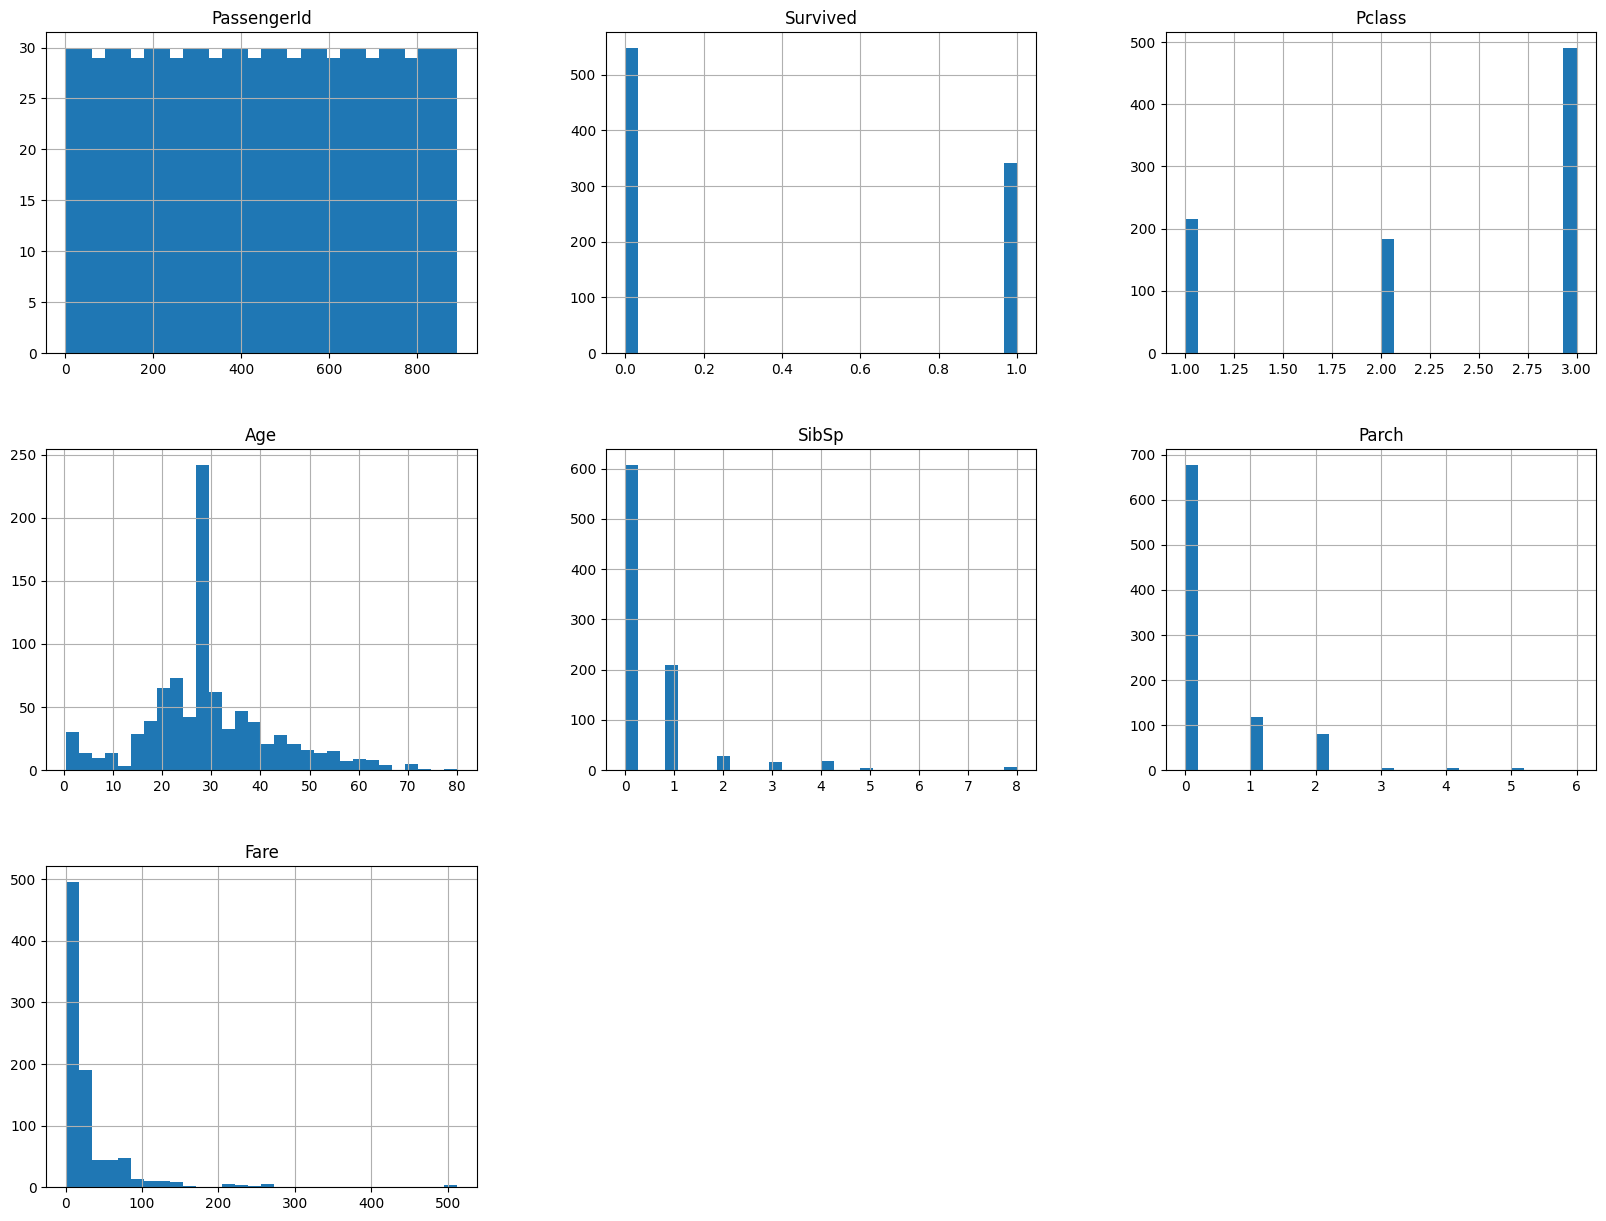

In [18]:
#Step:7

train_data.hist(bins=30, figsize=(20, 15))
plt.show()

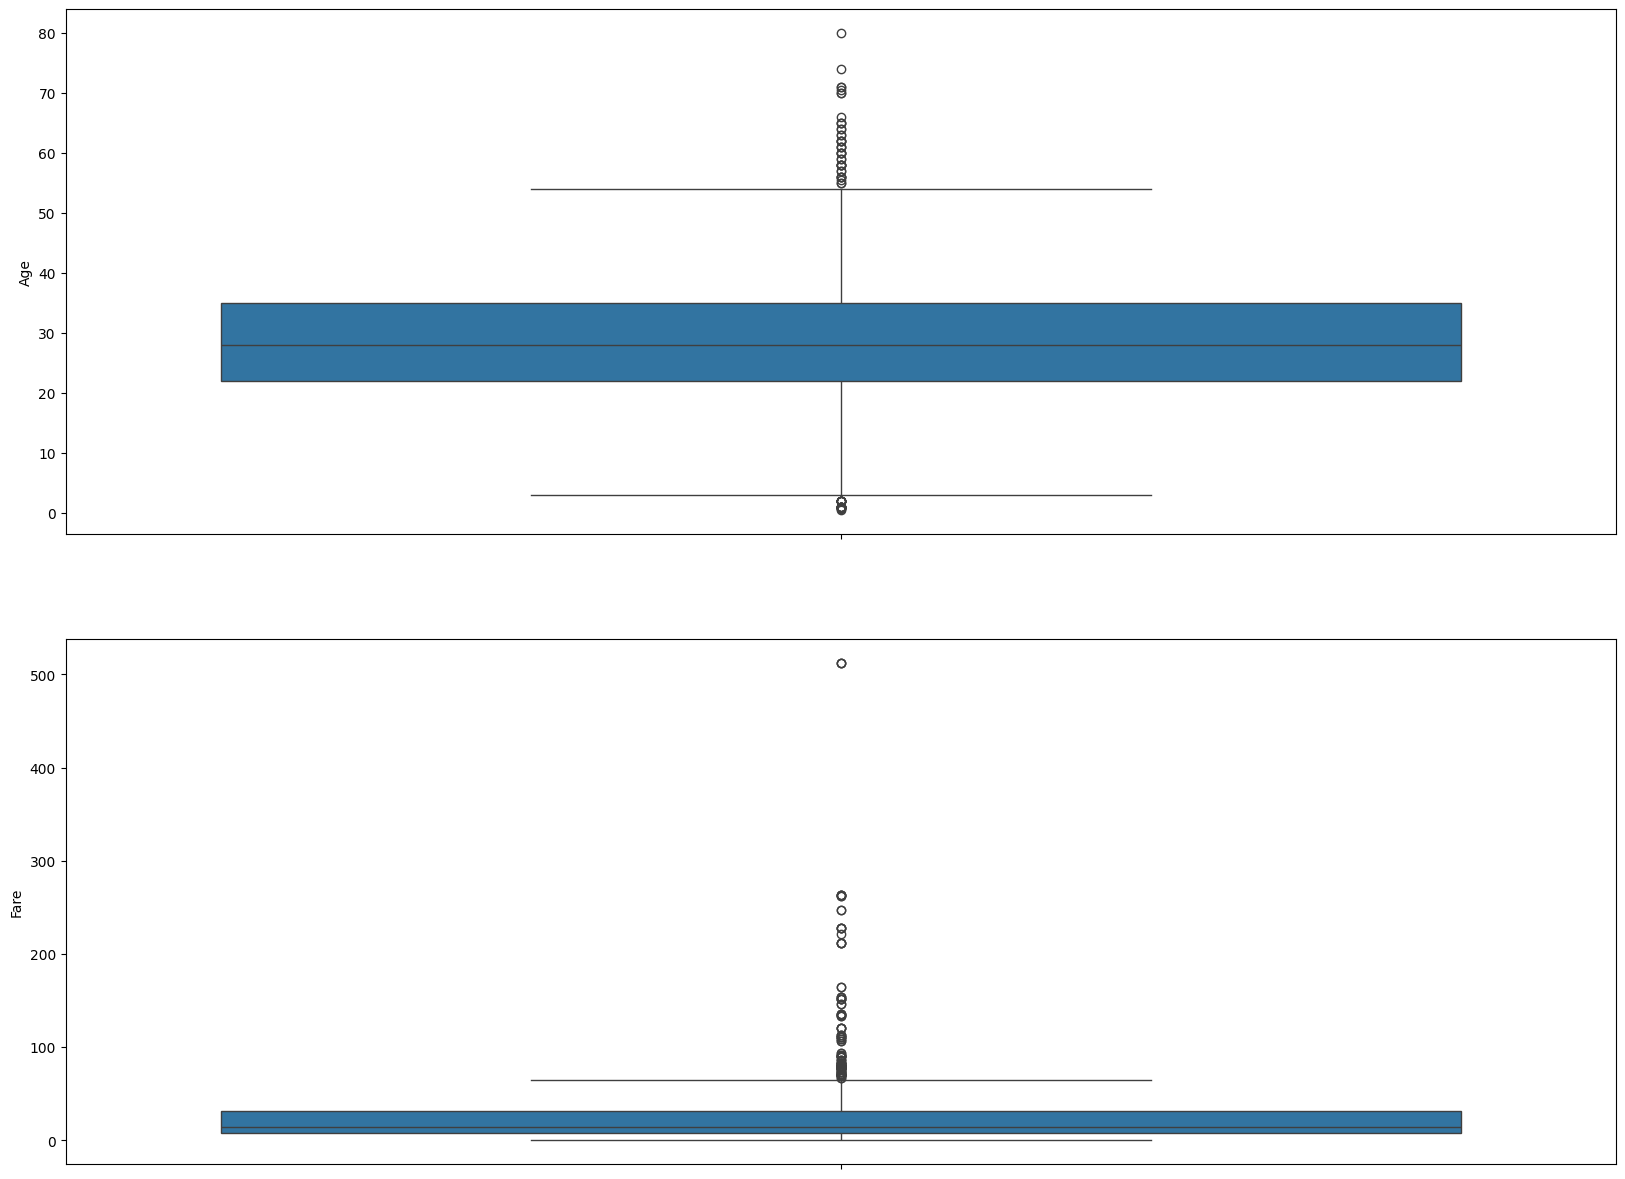

In [19]:
#Step: 7

plt.figure(figsize=(20, 15))
for i, column in enumerate(['Age', 'Fare']):
    plt.subplot(2, 1, i+1)
    sns.boxplot(data=train_data[column])
plt.show()

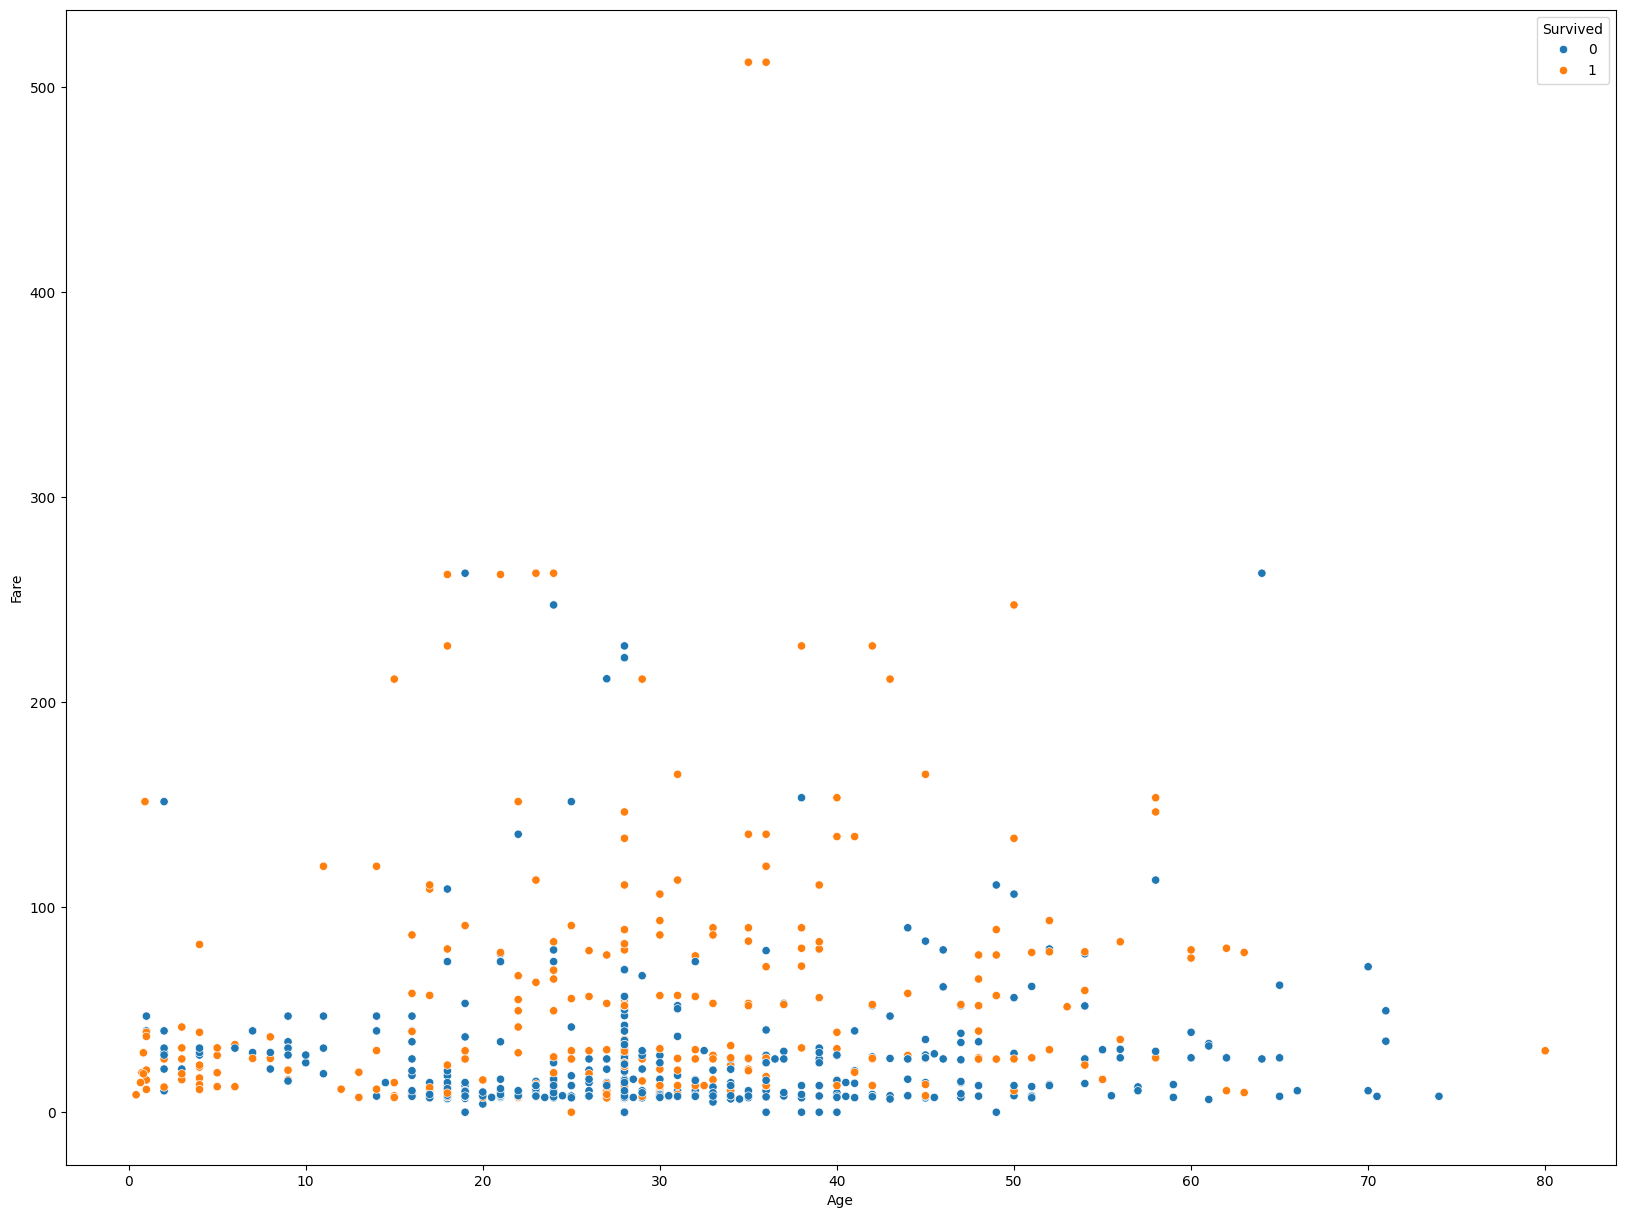

In [20]:
#Step:8

# Scatter plots
plt.figure(figsize=(20, 15))
sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived')
plt.show()


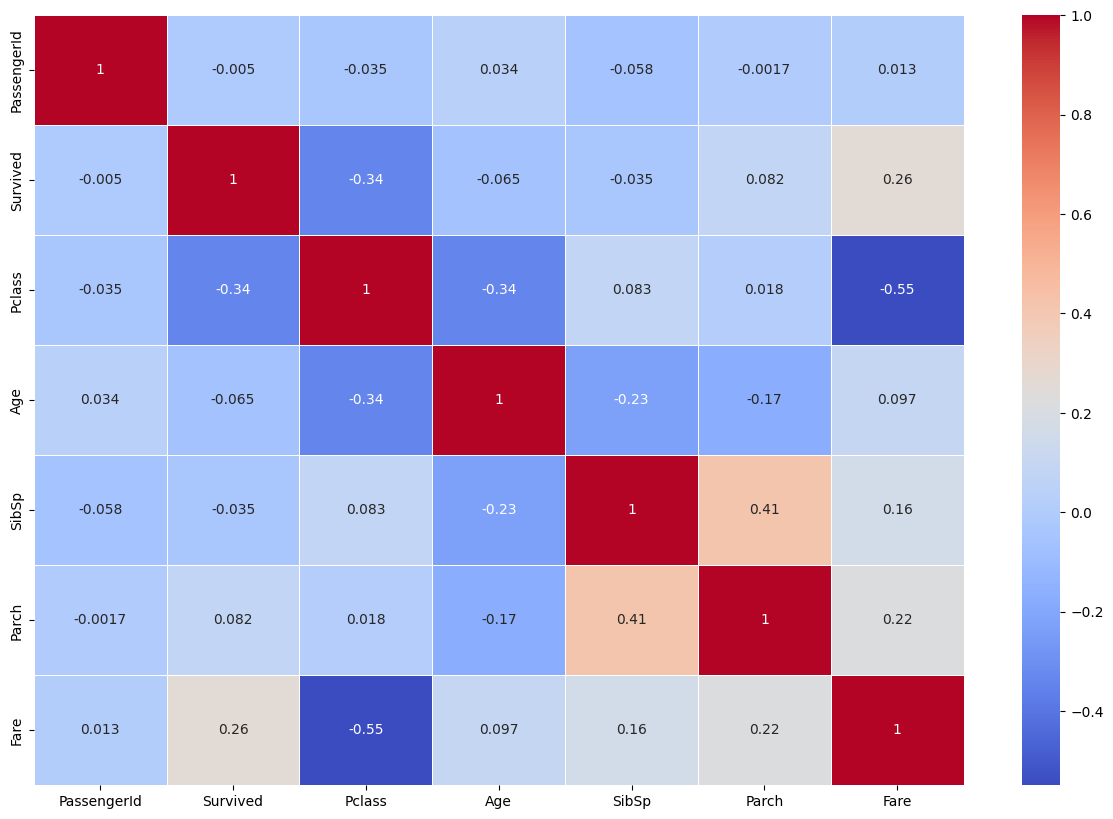

In [21]:
#step:9

# Select only numeric columns
numeric_data = train_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [22]:
#step 10 updated from error

# Example: Create a new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Example: Create a new feature 'IsAlone'
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)


In [23]:
# Step 11: Updated from error
# Check if columns exist before one-hot encoding
columns_to_encode = ['Sex', 'Embarked']

for col in columns_to_encode:
    if col in train_data.columns and col in test_data.columns:
        train_data = pd.get_dummies(train_data, columns=[col])
        test_data = pd.get_dummies(test_data, columns=[col])

# Ensure both train and test data have the same columns after encoding
train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)


In [24]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 463.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 487.6 kB/s eta 0:00:23
   ---------------------------------------- 0.1/11.0 MB 544.7 kB/s eta 0:00:21
   ---------------------------------------- 0.1/11.0 MB 521.8 kB/s eta 0:00:21
   ---------------------------------------- 0.1/11.0 MB 504.4 kB/s eta 0:00:22
   ---------------------------------------- 0.1/11.0 MB 479.3 kB/s eta 0:00:23
    --------------------------------------- 0.1/11.0 MB 500.5 kB/s eta 0:00:22
 

In [25]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.preprocessing import StandardScaler


In [27]:
# Step 12: (Updated) 
#Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'FamilySize']

train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Check the result
print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.565736      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861      1      0   
2                             Heikkinen, Miss. Laina -0.258337      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312      1      0   
4                           Allen, Mr. William Henry  0.433312      0      0   

             Ticket      Fare Cabin  FamilySize  IsAlone  Sex_female  \
0         A/5 21171 -0.502445   NaN    0.059160        0       False   
1          PC 17599  0.786845   C85    0.059160        0        True   
2  STON/O2. 3101282 -0.488854   NaN   -0.560975        1        True   
3            1

In [28]:
#Step: 13
from sklearn.utils import resample

In [29]:
#Step: 13
# Check for imbalance in the target variable
train_data['Survived'].value_counts()

# If imbalance is found, use resampling techniques
# Example: Upsample minority class
survived = train_data[train_data['Survived'] == 1]
not_survived = train_data[train_data['Survived'] == 0]

survived_upsampled = resample(survived, replace=True, n_samples=len(not_survived), random_state=42)
train_data = pd.concat([not_survived, survived_upsampled])

In [30]:
# Check the result
print(train_data.head())
print(test_data.head())


   PassengerId  Survived  Pclass                            Name       Age  \
0            1         0       3         Braund, Mr. Owen Harris -0.565736   
4            5         0       3        Allen, Mr. William Henry  0.433312   
5            6         0       3                Moran, Mr. James -0.104637   
6            7         0       1         McCarthy, Mr. Timothy J  1.893459   
7            8         0       3  Palsson, Master. Gosta Leonard -2.102733   

   SibSp  Parch     Ticket      Fare Cabin  FamilySize  IsAlone  Sex_female  \
0      1      0  A/5 21171 -0.502445   NaN    0.059160        0       False   
4      0      0     373450 -0.486337   NaN   -0.560975        1       False   
5      0      0     330877 -0.478116   NaN   -0.560975        1       False   
6      0      0      17463  0.395814   E46   -0.560975        1       False   
7      3      1     349909 -0.224083   NaN    1.919564        0       False   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0     